# **探讨影响泰坦尼克号上乘员生还率的因素**

## 一、背景及问题

先了解有关数据的背景来源有并由此引申出探讨的问题：

泰坦尼克号（RMS Titanic），是英国白星航运公司下辖的一艘奥林匹克级邮轮。1912年，在她的处女航中，泰坦尼克号便遭厄运——她从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，驶向美国纽约，船上时间1912年4月14日23时40分左右，泰坦尼克号与一座冰山相撞，造成右舷船艏至船中部破裂，五座水密舱进水。次日凌晨2时20分左右，泰坦尼克船体断裂成两截后沉入大西洋底3700米处。2224名船员及乘客中，逾1500人丧生，其中仅333具罹难者遗体被寻回。

由于灾难发生后场面及其混乱，加之文件管理不当、后世的种种说法又鱼龙混杂的因素，导致泰坦尼克号乘客与死难者的统计数据始终存疑。目前普遍认为罹难者人数可能在1490-1635人之间，其中可信度最高的数据是由英国贸易委员公布的：在灾难发生时，泰坦尼克号共搭载2224人，其中710人生还，1514人不幸罹难。其中，事发时泰坦尼克号上乘客约有1317人，共498人幸存；男性船员约有885人，共192人幸存；女性船员23人，共20人幸存。（数据来源：[百度百科](https://baike.baidu.com/item/%E6%B3%B0%E5%9D%A6%E5%B0%BC%E5%85%8B%E5%8F%B7/5677?fr=aladdin#1_7))

泰坦尼克号将乘客分为三个等级。三等舱位在船身较下层也最便宜，这一类的乘客身份多为计划在大西洋对岸营造新生活的移民；二等舱与一般客房的装潢摆设，其实具备与当时其他一般船只的头等舱一样的等级，许多二等舱乘客原先是在其他船只上定位头等舱，却因为了泰坦尼克号的航行，将煤炭能源转移给泰坦尼克号而作罢。一等舱是整艘船只最为昂贵奢华的部分，当时世界最富有的几位名人就在这趟旅程上。

灾难发生后，船长下令优先让妇孺登上救生艇，但由于救生艇数量不足以及没有尽可能地将载客量最大化，导致最终仅有31.79%的人生还（乘客生还率为37.81%)。

由上看见，乘客要想在这次灾难中存活，除了运气外，性别、年龄等因素也会影响其存活。所以，本文主要通过研究泰坦尼克号沉没事故中遭难者们的相关信息，探讨有哪些相关因素会影响当时乘客生还。
这里采用的泰坦尼克号乘客样本数据来源于：[Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)

## 二、读取、采集泰坦尼克号乘客样本相关数据

### 先导入将会用到的库：

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 查看相关数据的主要信息和属性：

In [3]:
titanic = pd.read_csv('titanic-data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 检查是否有哪些数据集存在数据缺失的状况

In [5]:
titanic_data = titanic.copy()
check_missing_data = titanic_data.isnull()
check_missing_data.sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 三、由上表可知各项变量的含义及其对于研究结果是否造成影响预测：
    Survived将会是这项分析研究的因变量和结果变量，1代表生还而0则代表死亡；
    而PassengerID、Ticket、Name作用则是识别乘员身份的变量，一般而言并不会影响是否生还这个结果变量，可以用作分组依据或识别标志；
    根据当时的营救原则“妇女小孩优先”的原则，预测Sex和Age这两个变量将会影响Survived这个结果变量，
    同时，Sex为定性分类型数据而Age则是定量离散型数据，Age数据集存在数据缺失的现象；
    Pclass作为客票分类更多的作用是暗示持有该票的主人的经济社会地位的高低，预测其对于是否会生还的结果影响不大；
    SibSp和Parch两个变量主要是介绍该乘客在船上相关的家庭成员人数，预测其数量越少，生还率越高（不用花费更多的时间照顾家人而导致错过逃生时机）；
    Fare变量不存在缺失，受Embarked、Pclass和Age三个变量的影响，预测其几乎不会对Survived造成影响；
    Cabin变量一般而言对于Survived也不会造成任何影响，而且该数据集存在大量数据缺失现象；
    Embarked变量更多的是影响Fare变量而对Survived的影响不大，且该数据集存在数据缺失。

## 四、初步清洗数据

由上采集的样本数据相关展示可见:
    目前，船上共891人。
    由于之前观察到Age部分缺失177人的相关数据，约占总乘客数的20%，删除这部分数据将会对后续结果变量的分析计算造成较大的影响，所以选择填充这部分数据。
    而Cabin数据集存在约77%的数据缺失，难以假设合理的值进行填充的同时，删除这部分数据也不会对Survived这一结果变量造成较大的影响，所以选择删除这部分数据。
    Embarked的数据集缺失比例相对较小（约0.22%),可以选择众数或者中位数来填充这部分数据。
    同时，由于PassengerId、Name以及Ticket三个变量的作用更多的是为了识别乘客身份，所以可以选择其中两个进行删除。
    Sex变量的数据目前仍以object的数据类型储存，为了方便后续计算分析，可以将其转化为int的数据类型。

In [7]:
revised_data = titanic_data.drop(['Cabin'], axis = 1)              #删除Cabin数据集
revised_data['Embarked'].fillna(revised_data['Embarked'].mode()[0], inplace = True)      #以Embarked数据集的众数最大的数据填充缺失的数据

由于Age的变量缺失较多，且不可能用同一个数来代替所有缺失的数据（即不可能用中位数或者众数填充剩余20%的数据，这样做会加大样本误差影响最后分析结果）。这里选择先将年龄按照一定的年龄段分组，将缺失的年龄数据另为一组，然后再根据乘客别的特征变量推出其缺失的年龄数据并重新分组。以分组年龄变量代替年龄变量分析其与生还变量的相关性。

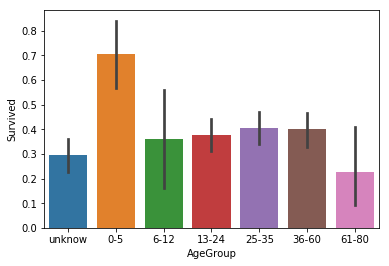

In [8]:
# 将年龄排序并分段
revised_data['Age'] = revised_data['Age'].fillna(-1)    #先将年龄缺失部分的数据定义为-1
# 0岁以下为未知，0-5岁为幼儿，6-12岁为儿童，13-24为青少年，25-35岁为青年，36-60岁为中年，60岁以上为老年
bins = [-2, 0, 5, 12, 24, 35, 60, np.inf]     
labels = ['unknow', '0-5', '6-12', '13-24', '25-35', '36-60', '61-80']    #样本数据中，年龄中最小值为0.42，最大值为80
revised_data['AgeGroup'] = pd.cut(revised_data['Age'] , bins, labels = labels)
# 查看各年龄段生还率的条形图
sns.barplot(x = 'AgeGroup', y = 'Survived', data = revised_data)

In [9]:
#先根据乘客的名称提取他们的头衔，再对比其头衔与其性别的人数分布状态
revised_data['Title'] = revised_data['Name'].str.extract('([A-Za-z]+)\.', expand = False)
pd.crosstab(revised_data['Title'],revised_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.250000
5   Royal  1.000000


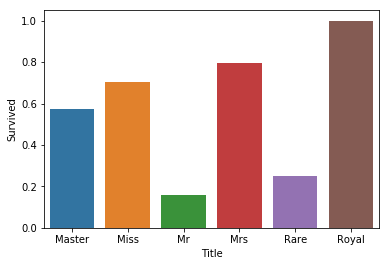

In [10]:
#由上表可以观察到有些名字里的头衔并不常用，难以辨别其特征（身份地位等）又或者部分头衔所代表的乘客特征重复，
#接下来将一些不常见或者重复的头衔进行替换统计

revised_data['Title'] = revised_data['Title'].replace(['Capt', 'Col', 'Don', 'Jonkheer','Major', 'Dr', 'Rev'],
                                                      'Rare')
revised_data['Title'] = revised_data['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
revised_data['Title'] = revised_data['Title'].replace(['Mlle', 'Ms'], 'Miss')
revised_data['Title'] = revised_data['Title'].replace('Mme', 'Mrs')

pd.crosstab(revised_data['Title'], revised_data['Sex'])
#观察各个头衔乘客的生还率
title_survived_group = revised_data[['Title', 'Survived']].groupby(['Title'],as_index = False).mean()
print title_survived_group
sns.barplot(x = 'Title', y = 'Survived', data = title_survived_group)

头衔代表女性或者皇室的乘客的生还率要明显高于别的头衔的乘客。

In [11]:
#先将Title这一定性型变量转化为数值：
title_mapping = {'Mr': 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
revised_data['Title'] = revised_data['Title'].map(title_mapping)

#检查是否存在无法被代替的头衔数据
revised_data['Title'].isnull().sum()

0

In [12]:
#先在各个头衔中选取一位较为有代表性的年龄段作为代替该头衔中存在的未知年龄段，这里选取各个头衔乘客存在最多的年龄段作为这一代表性年龄段
def mode_of_title(df, title_number):
    return df[df['Title'] == title_number]['AgeGroup'].mode()
mr_mode = mode_of_title(revised_data, 1)
miss_mode = mode_of_title(revised_data, 2)
mrs_mode = mode_of_title(revised_data, 3)
master_mode = mode_of_title(revised_data, 4)
royal_mode = mode_of_title(revised_data, 5)
rare_mode = mode_of_title(revised_data, 6)
    
print mr_mode
print miss_mode
print mrs_mode
print master_mode
print royal_mode
print rare_mode

0    25-35
Name: AgeGroup, dtype: category
Categories (7, object): [unknow < 0-5 < 6-12 < 13-24 < 25-35 < 36-60 < 61-80]
0    13-24
Name: AgeGroup, dtype: category
Categories (7, object): [unknow < 0-5 < 6-12 < 13-24 < 25-35 < 36-60 < 61-80]
0    36-60
Name: AgeGroup, dtype: category
Categories (7, object): [unknow < 0-5 < 6-12 < 13-24 < 25-35 < 36-60 < 61-80]
0    0-5
Name: AgeGroup, dtype: category
Categories (7, object): [unknow < 0-5 < 6-12 < 13-24 < 25-35 < 36-60 < 61-80]
0    36-60
Name: AgeGroup, dtype: category
Categories (7, object): [unknow < 0-5 < 6-12 < 13-24 < 25-35 < 36-60 < 61-80]
0    36-60
Name: AgeGroup, dtype: category
Categories (7, object): [unknow < 0-5 < 6-12 < 13-24 < 25-35 < 36-60 < 61-80]


In [13]:
#再将各个头衔的代表年龄段与其年龄相匹配
age_title_mapping = {1: '25-35', 2: '13-24', 3: '36-60', 4: '0-5', 5: '36-60', 6: '36-60'}

for age_group in range(len(revised_data['AgeGroup'])):
    if revised_data['AgeGroup'][age_group] == 'unknow':
        revised_data['AgeGroup'][age_group] = age_title_mapping[revised_data['Title'][age_group]]
        
#检查是否存在仍为unknow的Agegroup：
revised_data[revised_data['AgeGroup'] == 'unknow'].index.tolist()

[]

In [14]:
#至此已补全AgeGroup的所有数据，以AgeGroup这一特征代替存在数据缺失的Age特征：
revised_data = revised_data.drop(['Age'], axis = 1)
revised_data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,13-24,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,36-60,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,25-35,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,25-35,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,25-35,1


### 转化数据类型：
    为了方便后续计算分析，将定性型的数据量化方便后续分析计算，同时删除部分功能重复或已经没用的特征变量。

In [15]:
#将AgeGroup中各个年龄段分别用数字代替：
agegroup_mapping = {'0-5': 0, '6-12': 1, '13-24': 2, '25-35': 3, '36-60': 4, '61-80': 5}
revised_data['AgeGroup'] = revised_data['AgeGroup'].map(agegroup_mapping)

In [16]:
#删除Name、Ticket、Title三个特征变量（其作用更多是代表区别乘客，与PassengerId重复）：
revised_data = revised_data.drop(['Name', 'Ticket', 'Title'], axis = 1)
revised_data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,3,male,1,0,7.2500,S,2
1,2,1,1,female,1,0,71.2833,C,4
2,3,1,3,female,0,0,7.9250,S,3
3,4,1,1,female,1,0,53.1000,S,3
4,5,0,3,male,0,0,8.0500,S,3


In [17]:
revised_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
AgeGroup       891 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 62.7+ KB


由上可以看出，目前各项变量已经不存在缺失数据，各项变量的数据也已完成数据类型的转化，初步完成了数据清洗阶段工作。

## 四、数据探索

之前预测Age和Sex将会是影响Survived的两个重要的因素，且妇女和小孩的生还率相对较高；
接下来探索数据查看该预测是否准确。

### 首先先观察一下样本的生还率：

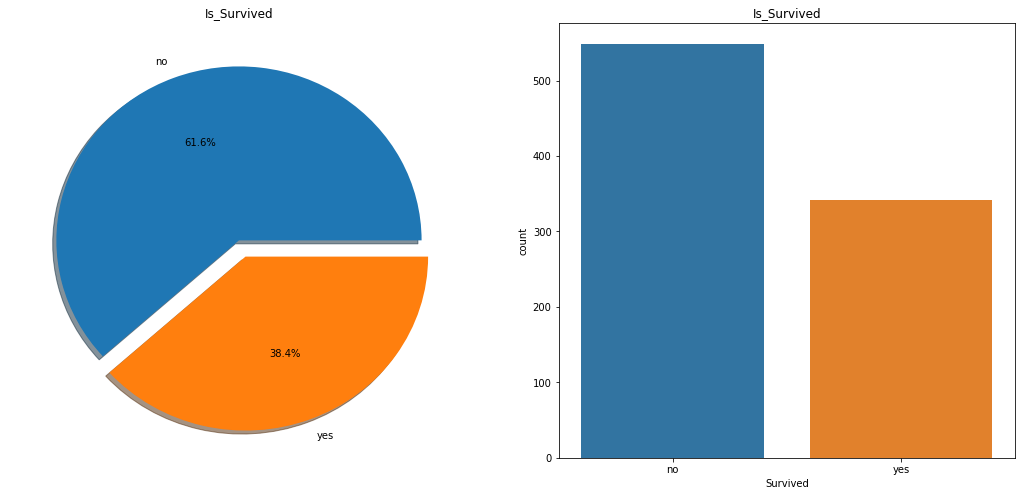

In [18]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
revised_data['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True, labels = ['no', 'yes'])
ax[0].set_title('Is_Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = revised_data, ax = ax[1])
ax[1].set_title('Is_Survived')
ax[1].set_xticklabels(['no', 'yes'], fontsize = 'medium')
plt.show()

由上图可以看出样本的生还率高达38.4%，但实际上事故发生时的1317位乘客中仅有498人幸存，生还率约为37.81%，所以该抽样样本的生还率要比总体的生还率要略高，但差距不大

In [19]:
def draw_barplot(data_group, x, y, title, ylabel, xticklabels):
    target_barplot = sns.barplot(x = x, y = y, data = data_group)
    target_barplot.set_title(title)
    target_barplot.set_ylabel(ylabel)
    target_barplot.set_xticklabels(xticklabels)
    return target_barplot

In [20]:
def draw_ylabel_title(plot, ylabel, title):
    plot.set_ylabel(ylabel)
    plot.set_title(title)
    return

In [21]:
def draw_countbar(groupdata, count_data, survived, title, ylabel):
    pd.crosstab(count_data, survived).plot.bar(stacked = True, figsize = (8, 5), color = ['b', 'r'])
    plt.xticks(rotation = 0, size = 'large')
    plt.legend(['death', 'survive'], bbox_to_anchor = (0.55, 0.9))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()
    return

In [39]:
def count_data(target, survived):
    print revised_data.groupby(target)[survived].count()

### Sex是否影响Survived：

Sex
female    314
male      577
Name: Survived, dtype: int64


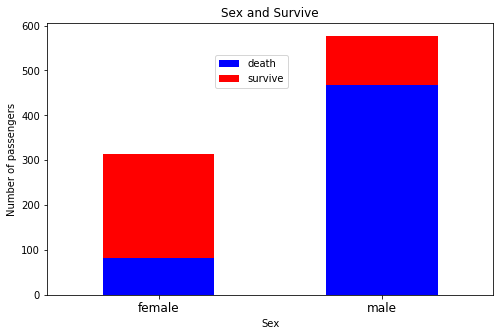

In [41]:
#先观察男女性之间遇难和幸存者人数分布：
count_data('Sex', 'Survived')
draw_countbar(revised_data, revised_data.Sex, revised_data.Survived, 'Sex and Survive', 'Number of passengers')

总体上，男性乘客的总人数几乎是女性乘客的两倍，但在幸存者人数上却几乎为女性乘客的一半，可见事故发生时，乘客们的确有遵守“女性优先获救”这一原则。

女性生还率: 18.89%
男性生还率: 74.20%


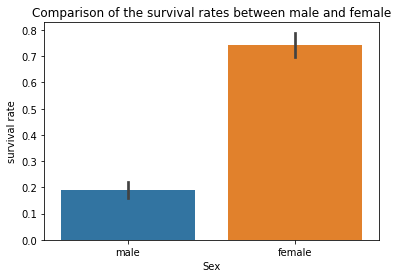

In [25]:
#查看男女之间生还率的条形图：
draw_barplot(revised_data, 'Sex', 'Survived', 'Comparison of the survival rates between male and female', 'survival rate', ['male', 'female'])
#计算男女之间的生还率：
female_survived = revised_data.groupby('Sex')['Survived'].mean()[1] * 100
male_survived = revised_data.groupby('Sex')['Survived'].mean()[0] * 100
print "女性生还率: %.2f%%" % female_survived
print "男性生还率: %.2f%%" % male_survived

由上看见女性的生还率要明显高于男性，Sex对于Survived有明显的影响。

### Age是否影响Survived：

AgeGroup
0     48
1     25
2    244
3    339
4    213
5     22
Name: Survived, dtype: int64


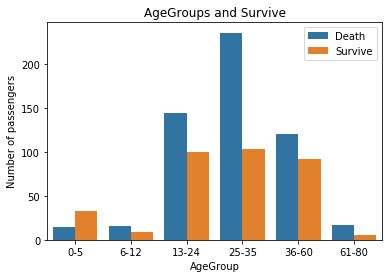

In [42]:
#先查看各组AgeGroup的人数分布情况：
count_data('AgeGroup', 'Survived')
#观察每个年龄组的幸存者和遇难者的人数分布状况：
AgeGroup_count = sns.countplot('AgeGroup', hue = 'Survived', data = revised_data)
AgeGroup_count.set_xticklabels(['0-5', '6-12', '13-24', '25-35', '36-60', '61-80'])
AgeGroup_count.legend(['Death', 'Survive'])
draw_ylabel_title(AgeGroup_count, 'Number of passengers', 'AgeGroups and Survive')
plt.show()

明显地，船上乘客大部分年龄在13-24,25-35,36-60这三个年龄段之间，其中25-35这一年龄段最多人，其遇难和幸存人数都为最高，而相对的，0-5,6-12,61-48这三个年龄段的乘客则是相对偏少，尤其是6-12和61-80这两个年龄段的乘客人数尚不足25-35年龄段的人数的十分之一，但同时，0-5年龄段的乘客是唯一一个幸存者多于遇难者的年龄段，表明乘客还是有遵守“婴儿优先获救”这一原则的。

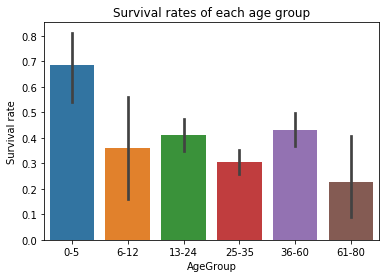

In [27]:
#查看各组AgeGroup与Survived之间的条形图:
draw_barplot(revised_data, 'AgeGroup', 'Survived', 'Survival rates of each age group', 'Survival rate',
             ['0-5', '6-12', '13-24', '25-35', '36-60', '61-80'])
plt.show()

对比可以看出0-5岁年龄组乘客的生还率要明显高于别的年龄段，虽然由于人数较少，限制了其与13-24,25-35,36-60这三个年龄段的可比性，但将其与人数相当的6-12和61-80这两个年龄段相比较则能明显看出Age和Survived存在一定的相关性。尤其是在6-12和61-80这两个年龄段之间做比较，两者的人数仅相差3位，但6-12年龄段的乘客生还率要明显地高于61-80这一年龄段，可能是由于年轻人相对于老年人在运动方面具有明显的运动优势增加了他们的存活几率。总而言之，Age对于Survived具有较为明显的影响，但并不能起决定性作用。

## Pclass是否会影响Survived：

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64


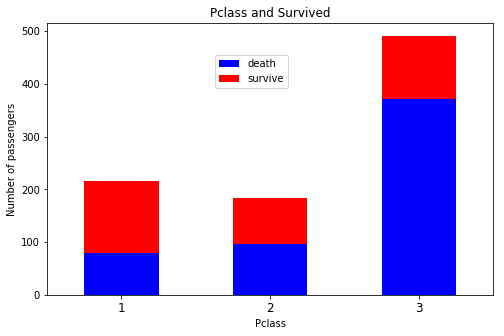

In [45]:
#先观察各个船舱的乘客人数分布：
count_data('Pclass', 'Survived')
draw_countbar(revised_data, revised_data.Pclass, revised_data.Survived, 'Pclass and Survived', 'Number of passengers')

头等舱的乘客生还率： 62.962963%
二等舱的乘客生还率： 47.282609%
三等舱的乘客生还率： 24.236253%


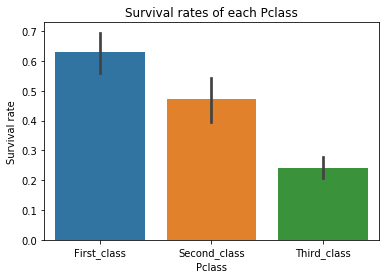

In [29]:
#查看Pclass与Survived之间的条形图:
draw_barplot(revised_data, 'Pclass', 'Survived', 'Survival rates of each Pclass', 'Survival rate',
            ['First_class', 'Second_class', 'Third_class'])
#查看各个Pclass的乘客的生还率：
print "头等舱的乘客生还率： %2f%%" % (titanic_data['Survived'][titanic_data['Pclass'] == 1].value_counts(normalize = True)[1] * 100)
print "二等舱的乘客生还率： %2f%%" % (titanic_data['Survived'][titanic_data['Pclass'] == 2].value_counts(normalize = True)[1] * 100)
print "三等舱的乘客生还率： %2f%%" % (titanic_data['Survived'][titanic_data['Pclass'] == 3].value_counts(normalize = True)[1] * 100)

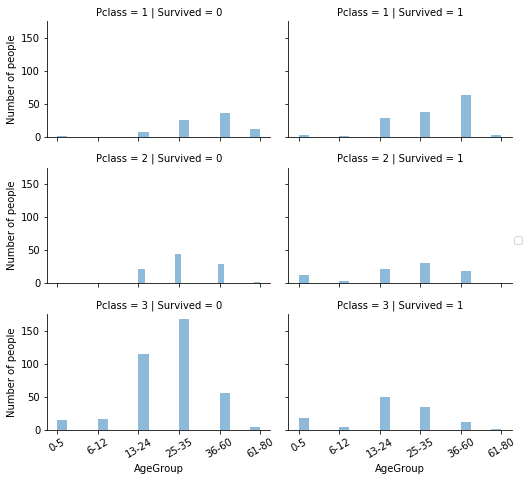

In [30]:
#对比各个舱位中各年龄段的存活和死亡人数：
Pclass_survived = sns.FacetGrid(revised_data, col = 'Survived', row = 'Pclass', size = 2.2, aspect = 1.6) 
Pclass_survived.map(plt.hist, 'AgeGroup', alpha = .5, bins = 20) 
Pclass_survived.add_legend(); 
Pclass_survived.set_xticklabels(['', '0-5', '6-12', '13-24', '25-35', '36-60', '61-80'], rotation = 30, fontsize = 'medium')
Pclass_survived.set_ylabels('Number of people')
plt.show()

由此看出，三等舱的人数最多但是幸存的人数却不多，存活率偏低；0-5年龄段的小孩存活的人数要明显多于不幸遇难的人数，这点尤其在二等舱、三等舱的对比中更加突出；头等舱的人数虽不多但存活率却为最高，与三等舱形成鲜明对比，证明了Pclass对于乘客是否生还有一定的影响，这一结果推翻之前“Pclass对是否会生还的影响不大”这一假设的同时加固了“Age对于Survived有明显的影响”这一论证。

## SibSp是否会影响Survived：

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: Survived, dtype: int64


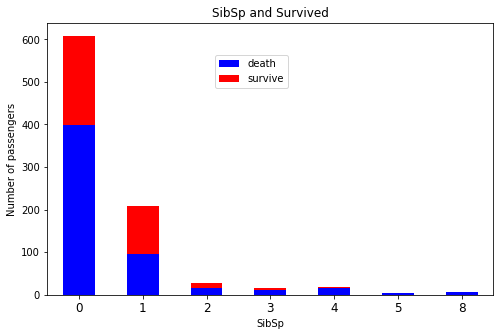

In [47]:
#先观察各组SibSp的乘客人数分布状况：
count_data('SibSp', 'Survived')
draw_countbar(revised_data, revised_data.SibSp, revised_data.Survived, 'SibSp and Survived', 'Number of passengers')

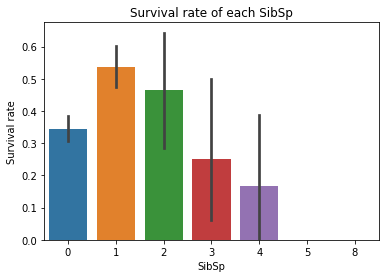

In [31]:
#查看SibSp与Survived之间的条形图:
draw_barplot(revised_data, 'SibSp', 'Survived', 'Survival rate of each SibSp', 'Survival rate',
            ['0', '1', '2', '3', '4', '5', '8'])
plt.show()

该条形图呈正偏态分布，大部分数据集中在1和2附近，表明船上有一到两位兄弟姐妹或配偶的乘客会有较高的生还率，而没有兄弟姐妹或者配偶又或者兄弟姐妹配偶人数超过2的乘客的生还率都会相对较低。但同时值得注意的是：船上大部分乘客都是没有陪同任何兄弟姐妹或配偶的，而陪同2位或以上兄弟姐妹或配偶的乘客数量偏少，不足样本总量的2%，证明这部分数据得出的存活率的可靠性偏低。即陪同1位兄弟姐妹或配偶的乘客会比没有兄弟姐妹或配偶陪同的乘客有更高的生还率，但陪同兄弟姐妹或配偶多于2位的乘客其生还率与其陪同兄弟姐妹或配偶的数量多少之间的关系不明显。

## Parch是否会影响Survived：

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Survived, dtype: int64


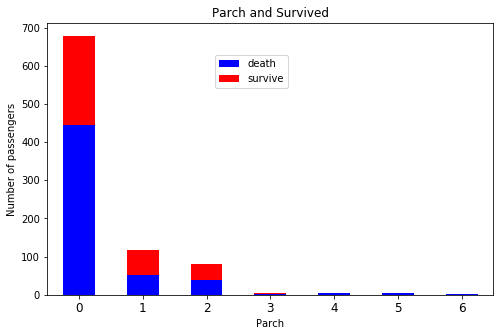

In [49]:
#先观察各组Parch的乘客人数分布状况：
count_data('Parch', 'Survived')
draw_countbar(revised_data, revised_data.Parch, revised_data.Survived, 'Parch and Survived', 'Number of passengers')

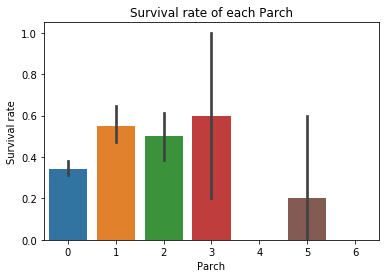

In [32]:
#查看Parch与Survived之间的条形图:
draw_barplot(revised_data, 'Parch', 'Survived', 'Survival rate of each Parch', 'Survival rate',
            ['0', '1', '2', '3', '4', '5', '6'])
plt.show()

结合两图可以看出，样本数据中，大部分乘客都是没有携带儿童或父母乘船的，小部分乘客携带1到2位父母或者儿童，而携带父母或儿童数量多于2位的乘客数量低于样本容量的1%，这样只能说明：船上伴有1到2名父母或儿童的乘客会比那些没携带儿童父母的乘客有着更大的生还率，但是携带父母或儿童数量超过2位的乘客的生还率与其携带儿童或父母的数量多少之间的关系不明显。
结合SibSp对于Survived的影响证明之前假设“SibSp和Parch所代表的的船上携带的家庭人数越少，其存活几率越大”这一假设有一定的合理之处也存在不相符的情况，就是船上伴有少数的家庭成员的乘客其存活几率会比那些没有携带家属的乘客要高，但船上伴有大量家属的乘客其生还率与其携带家属数量之间的关系并不明显。

## Embarked是否影响Survived：

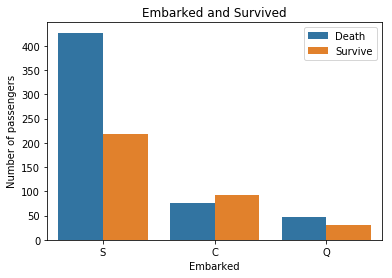

In [33]:
# 先查看在各个港口登陆的乘客总的遇难与幸存人数：
Embarked_count = sns.countplot('Embarked', hue = 'Survived', data = revised_data)
Embarked_count.legend(['Death', 'Survive'])
draw_ylabel_title(Embarked_count, 'Number of passengers', 'Embarked and Survived')
plt.show()

由上可以看出，在南安普顿港上船的乘客最多，同时也是遇难和存活人数最多的的港口。在法国瑟堡上船的乘客则是生还人数比遇难人数还高，而相对的，在南安普顿港和昆士敦港上船的乘客则是遇难人数要大于生还人数。

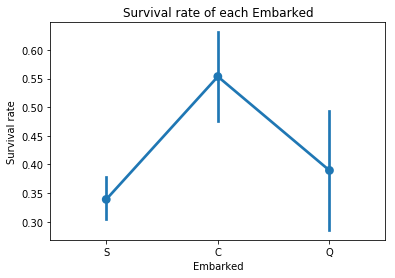

In [34]:
# 查看Embarked与Survived之间的点图
Embarked_pointplot = sns.pointplot(x = 'Embarked', y = 'Survived', data = revised_data)
draw_ylabel_title(Embarked_pointplot, 'Survival rate', 'Survival rate of each Embarked')
plt.show()

在瑟堡港上船的乘客生还率要明显地高于在南安普顿港或者昆士敦港上船的乘客。综合两图可以看出，Embarked对Survived存在一定的影响，不同港口上船的乘客的生还率存在明显的差异，推翻之前假设“Embarked变量对Survived的影响不大”。
结合事故背景：泰坦尼克号从英国的南安普顿港出发，途径法国瑟堡和爱尔兰昆士敦，并在驶向美国纽约的途中遇难。推测在昆士敦之前上船的人，有可能在瑟堡或昆士敦下船，这些人将不会遇到海难，由此导致在南安普顿港和瑟堡港上船的乘客有较多的生还人数，同时有相当部分在瑟堡港上船的乘客的乘客在昆士敦港下船导致其生还率远高于在南安普顿港和昆士敦港上船的乘客。

## Fare是否影响Survived：

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


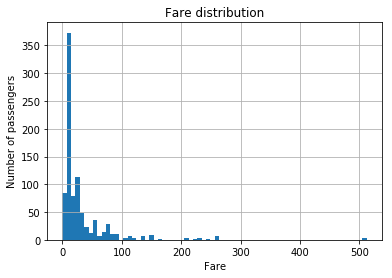

In [35]:
# 先了解并观察乘客们的票价的总体分布情况：
print revised_data['Fare'].describe()
Fare_hist = revised_data['Fare'].hist(bins = 70)
Fare_hist.set_xlabel('Fare')
draw_ylabel_title(Fare_hist, 'Number of passengers', 'Fare distribution')
plt.show()

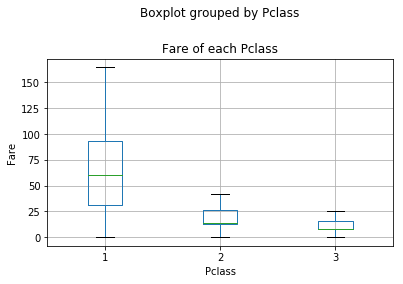

In [36]:
#由于Pclass对于Fare的影响较大，这里对比下不同船舱的票价之间的差异：
Pclass_Fare_distribution = revised_data.boxplot(column = 'Fare', by = 'Pclass', showfliers = False)
draw_ylabel_title(Pclass_Fare_distribution, 'Fare', 'Fare of each Pclass')
plt.subplots_adjust(top = 0.8)
plt.show()

由此可见，舱位的不同会导致票价存在较大的差异，尤其是头等舱与别的舱位相比，但二三等舱之间的差异却没有太明显。

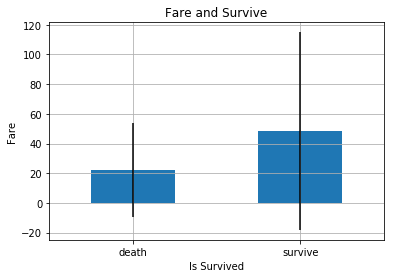

In [37]:
#对比生还者与遇难者之间的平均票价的差异：
fig, ax = plt.subplots(1, 1)
fare_not_survived = revised_data['Fare'][revised_data['Survived'] == 0]
fare_survived = revised_data['Fare'][revised_data['Survived'] == 1]
average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])
average_fare.plot(yerr = std_fare, kind = 'bar', legend = False, ax = ax)
plt.grid(True)
ax.set_xlabel('Is Survived')
ax.set_xticklabels(['death', 'survive'], rotation = 0)
draw_ylabel_title(ax, 'Fare', 'Fare and Survive')
plt.show()

由上可知，票价与是否生还有一定的相关性，生还者的平均票价要大于遇难者的平均票价。但由于票价本身受舱位影响，而不同的舱位其生还率也不相同，头等舱的乘客生还率最高，但同时其票价也是最高的，所以无法准确判断是票价决定生还还是舱位决定乘客是否生还，只能证明票价和舱位都会影响乘客是否生还。

## 各项变量是否会影响到乘客生还的总结：
    据故事背景，泰坦尼克号上共有1317名乘客（加上船员则共2224人）。样本数据只给出了891名乘客的相关信息，如果该数据集是从总共的1317人中随机选出的，根据中心极限定理，该样本的数据已经足够大（即使是在2224人中随机抽取也已足够大），那么我们的分析结果就具有代表性；但如果不是随机选取，那么我们的分析结果就可能不太靠谱了。
    总体而言，乘客的生还会受到乘客的性别、年龄、客舱类别、船上陪同的兄弟姐妹或配偶数量多少、船上携带的父母或孩童的数量多少、上船的港口以及票价这些特征变量的综合影响；同时，目前而言，只是证明了这七个变量与是否生还这一变量存在关联性，这些变量会在一定程度上影响乘客是否生还，但并没有足够的条件证明这七个变量与是否生还这一变量存在明显的因果关系。
    另外还有数据集中没有分析的几个特征：Ticket（船票号）、Cabin（船舱号）,这些因素的不同可能会影响乘客在船中的位置从而影响逃生的顺序。但是船舱号数据存在大量缺失，船票号类别大，这些因素导致其难以分析规律，所以本文并有对其与乘客是否生还进行相关性分析。

## 参考代码

完成项目的过程中参考用到的代码有：[Titanic Survival Predictions (Beginner)_BY_Nadin Tamer](https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner)、[Titanic Data Science Solutions BY Manav Sehgal](https://www.kaggle.com/startupsci/titanic-data-science-solutions)